In [1]:
import os
os.chdir("D:\Data Science\First_Project")

In [2]:
import pandas as pd
import numpy as py

In [3]:
employee_data=pd.read_excel("Absenteeism_at_work_Project.xls")

In [4]:
employee_sample=employee_data

In [5]:
#employee_sample.head(10)

In [6]:
#Import Missing values using KNN
from fancyimpute import KNN
employee_sample=pd.DataFrame(KNN(k=3).complete(employee_sample),columns=employee_sample.columns)

In [5]:
employee_sample=pd.read_csv("KNNImputed.csv")
employee_sample=pd.DataFrame(employee_sample)

In [6]:
#Detecting Outliers
import matplotlib.pyplot as plt
plt.boxplot(employee_sample['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f75e98bdd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f75e9a0f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f75e98bc18>],
 'medians': [<matplotlib.lines.Line2D at 0x1f75e9acfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f75e9b3eb8>],
 'means': []}

In [7]:
#cnames=employee_sample.columns
cnames=['ID', 'Reason.for.absence', 'Month.of.absence', 
        'Transportation.expense', 'Distance.from.Residence.to.Work',
       'Service.time', 'Age', 'Work.load.Average.day.', 'Hit.target', 
        'Son', 'Weight', 'Height', 'Body.mass.index']


In [8]:
#Detect and delete outliers from data
for i in cnames:
    q75,q25=py.percentile(employee_sample.loc[:,i],[75,25])
    iqr=q75-q25
    min_value = q25 - (iqr*1.5)
    max_value = q75 + (iqr*1.5)
    employee_sample=employee_sample.drop(employee_sample[employee_sample.loc[:,i]<min_value].index)
    employee_sample=employee_sample.drop(employee_sample[employee_sample.loc[:,i]>max_value].index)

In [9]:
import seaborn as sns
employee_sample=pd.read_csv("OutliersRemovedData.csv")

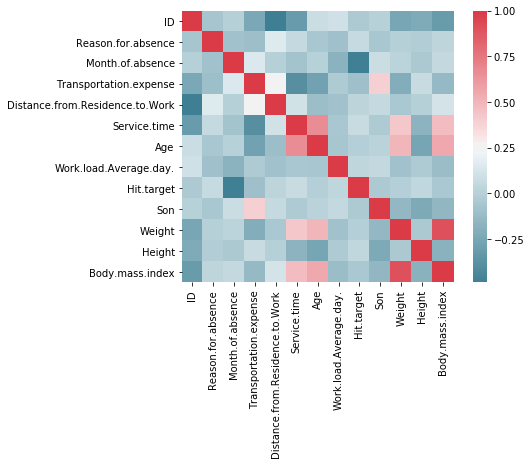

In [10]:
#Correlation Analysis
df_corr=employee_sample.loc[:,cnames]

#set height and width of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=py.zeros_like(corr, dtype=py.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [31]:
# Feature Scaling
#Normalization Technique
for i in cnames:
    employee_sample[i]=(employee_sample[i]-min(employee_sample[i]))/max(employee_sample[i]-min(employee_sample[i]))

In [32]:
from sklearn.cross_validation import train_test_split

In [33]:
train_data, test_data = train_test_split(employee_sample, test_size=0.2)

In [34]:
import statsmodels.api as sm

In [35]:
model = sm.OLS(train_data.iloc[:,20], train_data.iloc[:,0:20]).fit()

In [50]:
model.summary()

In [42]:
#Decision Tree Algorithm
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [43]:
train,test=train_test_split(employee_sample,test_size=0.2)

In [44]:
#Decision Tree Model
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:20], train.iloc[:,20])
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:20])

In [49]:
predictions_DT